In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

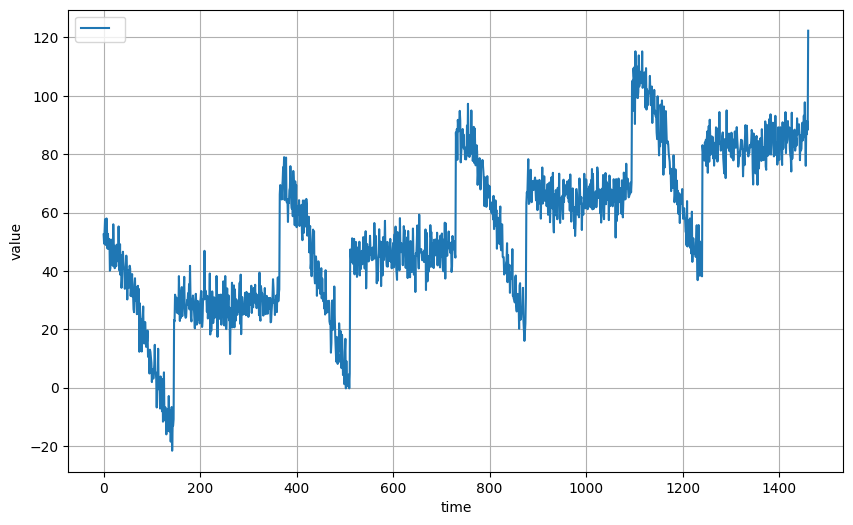

In [4]:
from SequenceModelsTimeSeries.utils import trend, seasonality, noise, plot_series

# Parameters
time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
series += noise(time, noise_level, seed=42)
plot_series(time, series)

In [5]:
split_time = 1000

# Get the train set 
time_train = time[:split_time]
x_train = series[:split_time]

# Get the validation set
time_valid = time[split_time:]
x_valid = series[split_time:]

In [6]:
# Parameters
window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

In [21]:
from SequenceModelsTimeSeries.utils import generate_windowed_dataset

dataset = generate_windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

for window in dataset.take(1):
  print(f'shape of feature: {window[0].shape}')
  print(f'shape of label: {window[1].shape}')

shape of feature: (32, 20)
shape of label: (32,)


In [8]:
layer = tf.keras.layers.Dense(1, input_shape=[window_size])
model = tf.keras.models.Sequential([layer])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 21 (84.00 Byte)
Trainable params: 21 (84.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9))
model.fit(dataset, epochs=100)

Epoch 1/100
31/31 [==============================] - 0s 2ms/step - loss: 3054.4946
Epoch 2/100
31/31 [==============================] - 0s 669us/step - loss: 220.9716
Epoch 3/100
31/31 [==============================] - 0s 646us/step - loss: 101.5408
Epoch 4/100
31/31 [==============================] - 0s 634us/step - loss: 97.8018
Epoch 5/100
31/31 [==============================] - 0s 600us/step - loss: 95.5541
Epoch 6/100
31/31 [==============================] - 0s 600us/step - loss: 95.0260
Epoch 7/100
31/31 [==============================] - 0s 602us/step - loss: 92.8698
Epoch 8/100
31/31 [==============================] - 0s 602us/step - loss: 89.0328
Epoch 9/100
31/31 [==============================] - 0s 601us/step - loss: 87.0353
Epoch 10/100
31/31 [==============================] - 0s 569us/step - loss: 85.5740
Epoch 11/100
31/31 [==============================] - 0s 600us/step - loss: 85.0836
Epoch 12/100
31/31 [==============================] - 0s 566us/step - loss: 82.3627

In [10]:
print("Layer feature_count {},  weights {}".format(len(layer.get_weights()[0]), layer.get_weights()))

Layer feature_count 20,  weights [array([[-0.07925937],
       [ 0.0618081 ],
       [ 0.04133253],
       [-0.06125391],
       [ 0.03399898],
       [ 0.01280095],
       [-0.09358929],
       [ 0.07020792],
       [ 0.08657231],
       [-0.05567206],
       [-0.00622782],
       [-0.05602599],
       [-0.02251624],
       [ 0.03975648],
       [ 0.10888171],
       [-0.01563276],
       [-0.00956351],
       [ 0.20498022],
       [ 0.2739602 ],
       [ 0.4430021 ]], dtype=float32), array([0.01610308], dtype=float32)]


In [11]:
print(series[1:22][np.newaxis])
model.predict(series[1:21][np.newaxis])

[[49.35275  53.314735 57.711823 48.934444 48.931244 57.982895 53.897125
  47.67393  52.68371  47.591717 47.506374 50.959415 40.086178 40.919415
  46.612473 44.228207 50.720642 44.454983 41.76799  55.980938 47.335835]]
1/1 [==============================] - 0s 49ms/step


array([[48.23474]], dtype=float32)

In [12]:
x_valid

array([ 71.34472 ,  68.98552 ,  64.6752  ,  61.15736 ,  67.89844 ,
        66.390305,  68.91469 ,  67.6307  ,  69.71901 ,  61.81174 ,
        71.091835,  65.51008 ,  74.91588 ,  61.11138 ,  73.25516 ,
        65.58317 ,  61.35506 ,  62.21152 ,  63.048264,  66.79013 ,
        67.30303 ,  61.840164,  64.60695 ,  75.460365,  73.40727 ,
        66.971954,  65.00137 ,  65.43278 ,  67.9217  ,  59.761875,
        63.610905,  56.577053,  66.938515,  68.20101 ,  62.571968,
        72.88092 ,  58.905464,  57.73595 ,  66.20383 ,  70.34101 ,
        73.54933 ,  62.859653,  70.57207 ,  65.010925,  64.36533 ,
        69.671974,  68.5407  ,  57.42275 ,  72.71323 ,  72.256996,
        62.25493 ,  67.38817 ,  67.9059  ,  66.7659  ,  62.737984,
        62.15856 ,  65.41626 ,  71.43522 ,  68.31729 ,  63.774124,
        69.51377 ,  51.440834,  71.45582 ,  57.042038,  63.957195,
        60.20002 ,  59.354107,  71.66096 ,  63.547802,  67.648476,
        65.71117 ,  68.36095 ,  66.39001 ,  59.62124 ,  71.048

In [13]:
x_valid

array([ 71.34472 ,  68.98552 ,  64.6752  ,  61.15736 ,  67.89844 ,
        66.390305,  68.91469 ,  67.6307  ,  69.71901 ,  61.81174 ,
        71.091835,  65.51008 ,  74.91588 ,  61.11138 ,  73.25516 ,
        65.58317 ,  61.35506 ,  62.21152 ,  63.048264,  66.79013 ,
        67.30303 ,  61.840164,  64.60695 ,  75.460365,  73.40727 ,
        66.971954,  65.00137 ,  65.43278 ,  67.9217  ,  59.761875,
        63.610905,  56.577053,  66.938515,  68.20101 ,  62.571968,
        72.88092 ,  58.905464,  57.73595 ,  66.20383 ,  70.34101 ,
        73.54933 ,  62.859653,  70.57207 ,  65.010925,  64.36533 ,
        69.671974,  68.5407  ,  57.42275 ,  72.71323 ,  72.256996,
        62.25493 ,  67.38817 ,  67.9059  ,  66.7659  ,  62.737984,
        62.15856 ,  65.41626 ,  71.43522 ,  68.31729 ,  63.774124,
        69.51377 ,  51.440834,  71.45582 ,  57.042038,  63.957195,
        60.20002 ,  59.354107,  71.66096 ,  63.547802,  67.648476,
        65.71117 ,  68.36095 ,  66.39001 ,  59.62124 ,  71.048

In [14]:
model.predict(x_valid[0:20][np.newaxis])

1/1 [==============================] - 0s 14ms/step


array([[64.210594]], dtype=float32)

In [15]:
forecast = []
# we get the split_time - window_size to predict de valid data and  check it
init_valid_data = split_time - window_size
end_point = -window_size

for time in range(len(series[init_valid_data:end_point])):
    start_point = init_valid_data + time
    end_point = init_valid_data + time + window_size
    prediction = model.predict(series[start_point:end_point][np.newaxis])
    forecast.append(prediction)

1/1 [==============================] - 0s 13ms/step


In [16]:
results = np.array(forecast)[:, 0, 0]
results.shape

(461,)

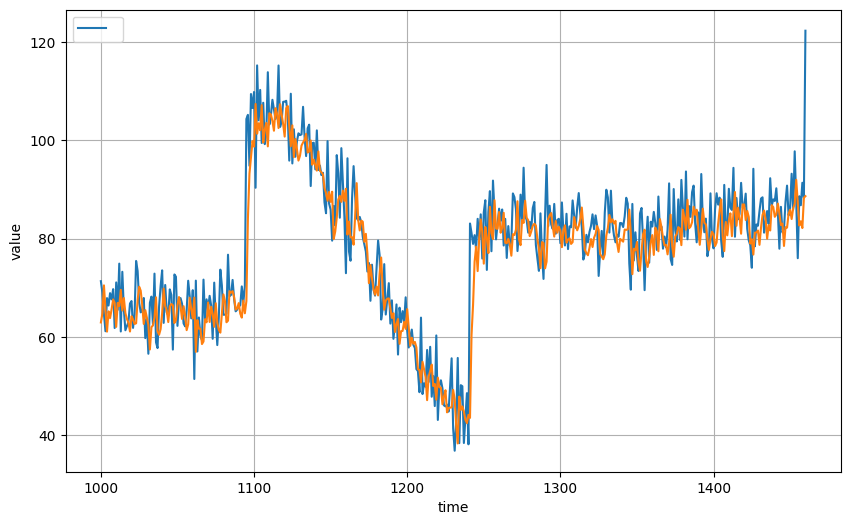

In [17]:
plot_series(time_valid, (x_valid, results))

In [18]:
#metrics
print("mse: ", tf.keras.metrics.mean_squared_error(x_valid, results).numpy())
print("mae: ", tf.keras.metrics.mean_absolute_error(x_valid, results).numpy())

mse:  48.692665
mae:  5.092395
